In [1]:
import inspect
import re
from collections import Counter, defaultdict
import pandas as pd

In [2]:
# The filtered dataset does not include Classnames, and has pd. and pandas. columns combined. Every row has > 0 tokens.
df = pd.read_csv("../data/filtered_token_breakdown.csv")


## Count and Coverage Analysis

In [3]:
counts = pd.DataFrame(df.iloc[:, 2:].sum().reset_index())
counts.columns = ["method_name", "count"]
counts.nlargest(25, ["count"])

,method_name,count
62,.append(,455144
291,.read_csv(,294496
227,.loc[,244266
186,.format(,244046
145,.mean(,161998
47,.apply(,152034
178,.groupby(,150734
247,.drop(,135721
42,.iloc[,135234
209,.join(,117992


In [4]:
coverage = pd.DataFrame((~(df.iloc[:, 2:] == 0)).sum().reset_index())
coverage.columns = ["method_name", "coverage"]
coverage["coverage"] = coverage["coverage"] / len(df)
coverage.nlargest(25, "coverage")

,method_name,coverage
291,.read_csv(,0.610854
62,.append(,0.393633
145,.mean(,0.234453
186,.format(,0.206366
247,.drop(,0.204668
178,.groupby(,0.193864
227,.loc[,0.186226
47,.apply(,0.184266
209,.join(,0.175345
275,.sum(,0.164007


## Examine the top and bottom functions by count/coverage

In [5]:
counts.nlargest(25, "count")

,method_name,count
62,.append(,455144
291,.read_csv(,294496
227,.loc[,244266
186,.format(,244046
145,.mean(,161998
47,.apply(,152034
178,.groupby(,150734
247,.drop(,135721
42,.iloc[,135234
209,.join(,117992


In [6]:
# For bottom functions, we exclude pandas and pd functions.
counts.nsmallest(25, "count")

,method_name,count
3,.to_flat_index(,0
5,.boxplot_frame(,0
18,.to_tuples(,0
21,.is_boolean(,0
22,.rdivmod(,0
23,.set_codes(,0
28,.get_locs(,0
29,.notna(,0
35,.read_xml(,0
49,.interval_range(,0


In [7]:
coverage.nlargest(25, "coverage")

,method_name,coverage
291,.read_csv(,0.610854
62,.append(,0.393633
145,.mean(,0.234453
186,.format(,0.206366
247,.drop(,0.204668
178,.groupby(,0.193864
227,.loc[,0.186226
47,.apply(,0.184266
209,.join(,0.175345
275,.sum(,0.164007


In [8]:
coverage.nsmallest(25, "coverage")

,method_name,coverage
3,.to_flat_index(,0.0
5,.boxplot_frame(,0.0
18,.to_tuples(,0.0
21,.is_boolean(,0.0
22,.rdivmod(,0.0
23,.set_codes(,0.0
28,.get_locs(,0.0
29,.notna(,0.0
35,.read_xml(,0.0
49,.interval_range(,0.0


In [9]:
x=len(counts[counts["count"]>2])
print(f"If we take out functions which has not been used by more than two notebooks,\
we are left with a very large middle core of {x} pandas functions.")

If we take out functions which has not been used by more than two notebooks,we are left with a very large middle core of 248 pandas functions.


In [10]:
counts[counts["count"]>2].sort_values("count")[:15]

,method_name,count
184,.lag_plot(,3
202,.andrews_curves(,3
13,.from_frame(,3
215,.truediv(,4
261,.is_mixed(,4
258,.rmul(,4
7,.read_feather(,4
77,.radd(,5
103,.to_native_types(,5
111,.rsub(,5


array([<AxesSubplot:title={'center':'coverage'}>], dtype=object)

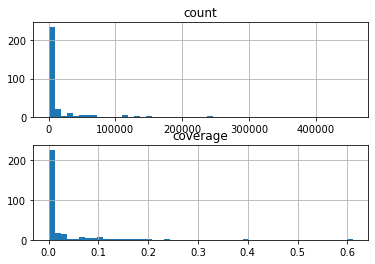

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1)
counts.hist(bins=50,ax=axes[0])
coverage.hist(bins=50,ax=axes[1])

### Breakdown of coverage percentage

In [12]:
coverage["bins"] = pd.cut(coverage.coverage,bins=(0,0.01,0.05,0.1,0.65),labels=["0-1%","1-5%","5-10%","10-65%"],right=False)

In [13]:
coverage["bins"].value_counts()

0-1%      221
1-5%       41
5-10%      21
10-65%     21
Name: bins, dtype: int64

### Number of functions in a notebook

In [14]:
num_func = df.iloc[:, 2:].sum(axis=1)
num_func.mean()

19.773079251641636

In [15]:
num_func.median()

12.0

In [16]:
num_func.max()

1613

## Cumulative Distribution based on Rank

The key idea behind optimized cumulative coverage is that we want to find the _least_ common function for each script. If we know the least common function for each script, then we know at what point our cumulative coverage will cover that script entirely.

The algorithm is:
1. Sort the columns by descreasing coverage (most to least common).
2. For each row, find the rank (rank 1 = most common) of the least common function, which is the `least_common_rank`.
3. Group by and count the `least_common_ranks` of all columns. This gives us a mapping of `least_common_rank` to `count`. When sorted by rank, the mapping of `least_common_rank` to `count` tells us, for each function __x__ (if iterating in increasing rank) how many __additional__ scripts are covered by __x__.
4. With the mapping sorted by rank, we compute the cumulative sum, which gives us a mapping of `least_common_rank` to `cumulative_count` where `cumulative_count` is now the number of scripts that are covered by `least_common_rank` functions or __less__. As a sanity check, the `cumulative_count` of the least common function should be equal to the total number of scripts.
5. With the cumulative sum mapping, we can divide each `count` by the total number of scripts to get a cumulative percentage.

In [17]:
ordered_top_funcs = list(
    coverage.sort_values("coverage", ascending=False)["method_name"]
)
print(len(ordered_top_funcs))

304


In [18]:
# (1) Get the top functions, sorted.
top_funcs_df = df[ordered_top_funcs]
top_funcs_df

,.read_csv(,.append(,.mean(,.format(,.drop(,.groupby(,.loc[,.apply(,.join(,.sum(,...,.holds_integer(,.read_xml(,.is_categorical(,.remove_unused_levels(,.get_loc_level(,.is_object(,.divmod(,.to_xml(,.notna(,.is_floating(
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,2,5,0,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236192,2,4,2,0,10,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
236193,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236194,0,0,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236195,0,2,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
"""
Helper that returns the rank of the least common function
that is in a row/script. This rank corresponds to the rank
where the entire script's functions are covered.
"""


def least_common_function_rank(row):
    for i, val in reversed(list(enumerate(row))):
        if val != 0:
            return int(i + 1)

In [20]:
# (2) For each row, find the rank (rank 1 = most common) of the least common function, which is the least_common_rank.
least_common_ranks = top_funcs_df.apply(
    lambda row: least_common_function_rank(row), axis=1
)
least_common_ranks

0           1
1          55
2          88
3         105
4          26
         ... 
236192     62
236193      3
236194     18
236195      4
236196     95
Length: 236197, dtype: int64

In [21]:
"""
(3) Group by and count the least_common_ranks of all columns. This gives us a mapping of
least_common_rank to count. When sorted by rank, the mapping of least_common_rank to
count tells us, for each function x (if iterating in increasing rank) how many 
additional scripts are covered by x.

NOTE: This does not have to be monotonically increasing.
Imagine the function rank is: 1. read_csv 2. plot 3. mean 4. to_csv and there are
only two types of users, ones who use read_csv and plot, and ones who use read_csv,
mean, to_csv. read_csv is the most common function, used in all scripts. However, its
least_common_ranks_count would be 0, since everyone who uses read_csv also uses
another less common function.
"""
least_common_ranks_count = least_common_ranks.groupby(least_common_ranks).count()
least_common_ranks_count

1      6560
2      4483
3       846
4      2374
5      2356
       ... 
256       1
257       1
258       1
259       1
260       1
Length: 260, dtype: int64

In [22]:
"""
(4) With the mapping sorted by rank, we compute the cumulative sum, which gives 
us a mapping of least_common_rank to cumulative_count where cumulative_count is
now the number of scripts that are covered by least_common_rank functions or 
less. As a sanity check, the cumulative_count of the least common function
should be equal to the total number of scripts.
"""

least_common_ranks_cumulative_count = (
    least_common_ranks_count.cumsum()
)  # Get the cumulative sum of the series.
print(least_common_ranks_cumulative_count.iloc[-1])
assert (
    least_common_ranks_cumulative_count.iloc[-1] == df.shape[0]
), "The cumulative sum of the least common function should be equal to the number of rows."
least_common_ranks_cumulative_count

236197


1        6560
2       11043
3       11889
4       14263
5       16619
        ...  
256    236193
257    236194
258    236195
259    236196
260    236197
Length: 260, dtype: int64

In [23]:
least_common_ranks_count.sum()== df.shape[0]

True

In [24]:
"""
(5) With the cumulative sum mapping, we can divide each count
by the total number of scripts to get a cumulative percentage.
"""

coverage_rank_cumulative_perc = least_common_ranks_cumulative_count / df.shape[0]*100
coverage_rank_cumulative_perc

1        2.777343
2        4.675335
3        5.033510
4        6.038603
5        7.036076
          ...    
256     99.998306
257     99.998730
258     99.999153
259     99.999577
260    100.000000
Length: 260, dtype: float64

In [25]:
coverage_rank_cumulative_perc

1        2.777343
2        4.675335
3        5.033510
4        6.038603
5        7.036076
          ...    
256     99.998306
257     99.998730
258     99.999153
259     99.999577
260    100.000000
Length: 260, dtype: float64

In [26]:
k = 3
pct = coverage_rank_cumulative_perc.iloc[k]
print(f"Top k func: {pct:.2f}%, {int(pct*df.shape[0]/100)} notebooks")

Top k func: 6.04%, 14262 notebooks


In [27]:
k = 50
pct = coverage_rank_cumulative_perc.iloc[k]
print(f"Top k func: {pct:.2f}%, {int(pct*df.shape[0]/100)} notebooks")

Top k func: 47.82%, 112947 notebooks


In [28]:
k = 178
pct = coverage_rank_cumulative_perc.iloc[k]
print(f"Top k func: {pct:.2f}%, {int(pct*df.shape[0]/100)} notebooks")

Top k func: 99.06%, 233968 notebooks


(0.0, 105.0)

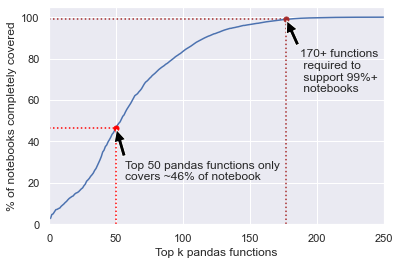

In [29]:
import seaborn as sns
sns.set_theme()
coverage_rank_cumulative_perc.plot()

y_pt = coverage_rank_cumulative_perc.iloc[50-1]

plt.xlabel("Top k pandas functions")
plt.ylabel("% of notebooks completely covered")
plt.annotate(f'Top 50 pandas functions only \ncovers ~{int(y_pt)}% of notebook',
             xy=(50,y_pt),  xycoords='data',
            xytext=(57,y_pt-25), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05)
            )

plt.hlines(y_pt,xmin=0,xmax=50, linestyle='dotted',color="red")
plt.vlines(50,ymin=0,ymax=y_pt, linestyle='dotted',color="red")
plt.plot(50,y_pt,marker=".",markersize=10,color="red")

y_pt=99
x_pt = 177
plt.hlines(y_pt,xmin=0,xmax=x_pt, linestyle='dotted',color="brown")
plt.vlines(x_pt,ymin=0,ymax=y_pt, linestyle='dotted',color="brown")
plt.plot(x_pt,y_pt,marker=".",markersize=10,color="brown")
plt.annotate(f'170+ functions\n required to\n support 99%+\n notebooks',
             xy=(x_pt,y_pt),  xycoords='data',
            xytext=(x_pt+10,y_pt-35), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05)
            )


plt.xlim(0,250)
plt.ylim(0,105)